<a href="https://colab.research.google.com/github/minhson11/FIT4007_Java-OOP/blob/main/CNTT_17_01_Nguy%E1%BB%85n_Minh_S%C6%A1n_B%C3%A0i_Ki%E1%BB%83m_Tra_S%E1%BB%91_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Các dòng có lỗi dữ liệu:
    Mã đơn hàng    Ngày mua    Tên sản phẩm    Danh mục Giá bán  Số lượng  \
0          1001  2025-01-15       iPhone 15  Smartphone    1200       2.0   
1          1002  2025-01-16     Samsung S23  Smartphone    1100       3.0   
2          1003  2025/01/17       Xiaomi 13  Smartphone     900      -1.0   
3          1004  15-01-2025      Oppo Reno8  Smartphone     NaN       5.0   
4          1005  2025-01-18             NaN  Smartphone    1000       1.0   
5          1006  2025-01-19       iPhone 14  Smartphone    1150       2.0   
6          1007         NaN       Realme GT  Smartphone     850       4.0   
7          1008  2025-01-20     Samsung A54  Smartphone   1100$       3.0   
8          1009  2025-01-21        Vivo V25  Smartphone     950       NaN   
9          1010  2025-01-22  Google Pixel 7  Smartphone     980       2.0   
10         1011  2025-01-23       iPhone 13  Smartphone    1000       1.0   
11         1012  2025-01-24     Samsung S22  Smartp

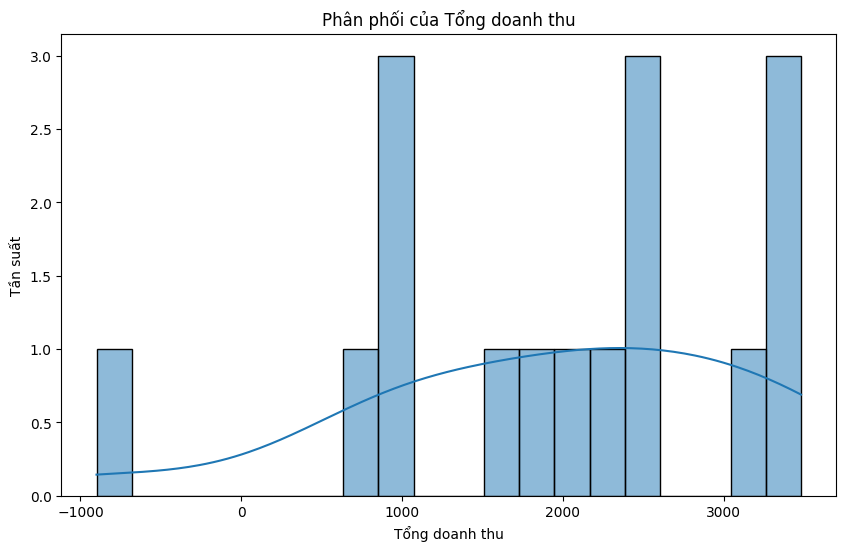

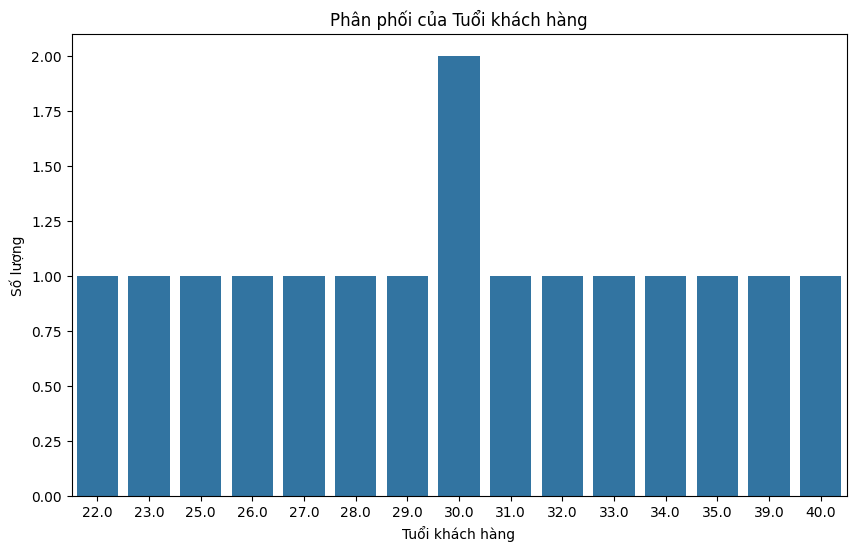

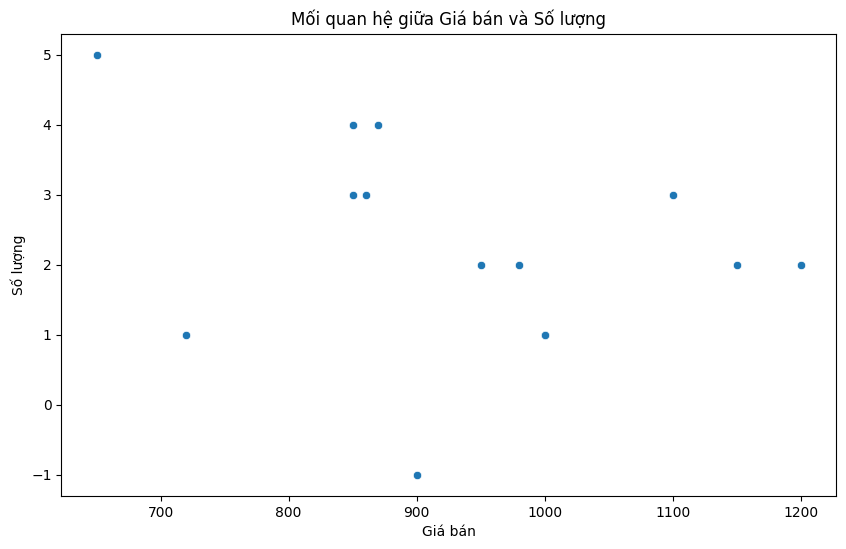


🔹 Kết quả hồi quy tuyến tính:
Phương trình hồi quy: y = 1005.19 + -31.02x
Hệ số chặn (Intercept - beta_0): 1005.1851851851852
Hệ số góc (Slope - beta_1): -31.018518518518533
Hệ số xác định (R²): 0.0966
Sai số bình phương trung bình (MSE): 19832.4074


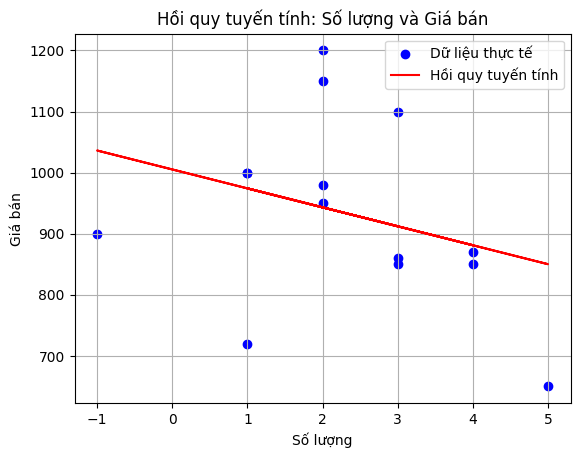

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#Đọc file
df = pd.read_excel("/content/drive/MyDrive/CNTT 17-01_Nguyễn Minh Sơn_BKT2.xlsx")

# Kiểm tra dữ liệu bị thiếu
missing_values = df.isnull().sum()

# Kiểm tra định dạng ngày
def check_date_format(date):
    try:
        pd.to_datetime(date, format="%Y-%m-%d")  # Chuẩn định dạng YYYY-MM-DD
        return False
    except:
        return True

df["Ngày mua lỗi"] = df["Ngày mua"].astype(str).apply(check_date_format)

# Kiểm tra cột giá bán (có ký tự lạ hoặc không phải số)
def check_price(price):
    try:
        float(str(price).replace("$", ""))  # Loại bỏ ký tự '$' và chuyển sang số
        return False
    except:
        return True

df["Giá bán lỗi"] = df["Giá bán"].astype(str).apply(check_price)

# Kiểm tra số lượng âm
df["Số lượng lỗi"] = df["Số lượng"].apply(lambda x: x if isinstance(x, (int, float)) and x >= 0 else True)

# Kiểm tra tổng doanh thu có bị lỗi không
df["Tổng doanh thu lỗi"] = df.apply(
    lambda row: True if not isinstance(row["Tổng doanh thu"], (int, float)) or row["Tổng doanh thu"] < 0 else False, axis=1
)

# Kiểm tra tuổi khách hàng có hợp lệ không (có chữ, không phải số)
def check_age(age):
    try:
        if isinstance(age, str) and not age.isnumeric():
            return True
        age = int(age)
        return age <= 0 or age > 100  # Giới hạn tuổi hợp lý từ 1 đến 100
    except:
        return True

df["Tuổi lỗi"] = df["Tuổi khách hàng"].apply(check_age)

# Hiển thị các lỗi
error_columns = ["Ngày mua lỗi", "Giá bán lỗi", "Số lượng lỗi", "Tổng doanh thu lỗi", "Tuổi lỗi"]
errors = df[df[error_columns].any(axis=1)]
print("Các dòng có lỗi dữ liệu:")
print(errors)

# Xuất lỗi ra file Excel để kiểm tra
error_file_path = "sales_data_errors.xlsx"
errors.to_excel(error_file_path, index=False)
print(f"Các lỗi đã được lưu vào: {error_file_path}")

# Chuyển các cột số về dạng số (loại bỏ lỗi ký tự)
df["Giá bán"] = pd.to_numeric(df["Giá bán"], errors="coerce")
df["Số lượng"] = pd.to_numeric(df["Số lượng"], errors="coerce")
df["Tổng doanh thu"] = pd.to_numeric(df["Tổng doanh thu"], errors="coerce")
df["Tuổi khách hàng"] = pd.to_numeric(df["Tuổi khách hàng"], errors="coerce")

# Tính các chỉ số thống kê cơ bản
statistics = df.describe().T  # Chuyển vị để dễ đọc

# Tính phương sai và thêm vào DataFrame
# Chỉ bao gồm các cột số để tính phương sai
numeric_columns = df.select_dtypes(include=['number']).columns  # Lấy danh sách các cột số
variance = df[numeric_columns].var()  # Tính phương sai chỉ cho các cột số
statistics["Phương sai"] = variance

# Hiển thị kết quả
print("Các chỉ số thống kê cơ bản:")
print(statistics)

# Lưu vào file Excel
statistics_file_path = "sales_data_statistics.xlsx"
statistics.to_excel(statistics_file_path)
print(f"Các chỉ số thống kê đã được lưu vào: {statistics_file_path}")

# Vẽ biểu đồ cột cho "Tổng doanh thu"
plt.figure(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ
sns.histplot(df['Tổng doanh thu'], bins=20, kde=True)  # Vẽ biểu đồ phân phối
plt.title('Phân phối của Tổng doanh thu')
plt.xlabel('Tổng doanh thu')
plt.ylabel('Tần suất')
plt.show()

# Vẽ biểu đồ cột cho "Tuổi khách hàng"
plt.figure(figsize=(10, 6))
sns.countplot(x='Tuổi khách hàng', data=df)  # Vẽ biểu đồ cột
plt.title('Phân phối của Tuổi khách hàng')
plt.xlabel('Tuổi khách hàng')
plt.ylabel('Số lượng')
plt.show()

# Vẽ biểu đồ phân tán cho "Giá bán" và "Số lượng"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Giá bán', y='Số lượng', data=df)
plt.title('Mối quan hệ giữa Giá bán và Số lượng')
plt.xlabel('Giá bán')
plt.ylabel('Số lượng')
plt.show()

# Chuyển dữ liệu thành DataFrame (nếu cần)
df = pd.DataFrame(df)

# Chuyển đổi thành mảng numpy
X = df["Số lượng"].values.reshape(-1, 1)  # Biến độc lập (reshape thành ma trận cột)
y = df["Giá bán"].values  # Biến phụ thuộc

# Loại bỏ các hàng chứa NaN trong X hoặc y
# Trước khi fit mô hình, ta cần loại bỏ các hàng chứa NaN trong X hoặc y
X_no_nan = X[~pd.isnull(X).flatten()] # flatten để lấy mảng 1D
y_no_nan = y[~pd.isnull(X).flatten()] # cùng mask để loại bỏ nhất quán từ cả X và y
X_no_nan = X_no_nan[~pd.isnull(y_no_nan)] # loại bỏ NaN từ y
y_no_nan = y_no_nan[~pd.isnull(y_no_nan)]

# Xây dựng mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_no_nan, y_no_nan) # Fit mô hình với dữ liệu đã được làm sạch
y_pred = model.predict(X_no_nan) # Dự đoán bằng dữ liệu đã được làm sạch


# Tính toán hệ số hồi quy
beta_0 = model.intercept_  # Hệ số chặn
beta_1 = model.coef_[0]    # Hệ số góc

# Đánh giá mô hình
r2 = r2_score(y_no_nan, y_pred)  # Hệ số xác định R^2, sử dụng y_no_nan và y_pred cùng shape
mse = mean_squared_error(y_no_nan, y_pred)  # Sai số bình phương trung bình (MSE), sử dụng y_no_nan và y_pred cùng shape

# Hiển thị kết quả
print("\n🔹 Kết quả hồi quy tuyến tính:")
print(f"Phương trình hồi quy: y = {beta_0:.2f} + {beta_1:.2f}x")
print(f"Hệ số chặn (Intercept - beta_0): {beta_0}")
print(f"Hệ số góc (Slope - beta_1): {beta_1}")
print(f"Hệ số xác định (R²): {r2:.4f}")
print(f"Sai số bình phương trung bình (MSE): {mse:.4f}")

# Vẽ biểu đồ
plt.scatter(X_no_nan, y_no_nan, color="blue", label="Dữ liệu thực tế") # Thay X bằng X_no_nan, y bằng y_no_nan
plt.plot(X_no_nan, y_pred, color="red", label="Hồi quy tuyến tính") # Thay X bằng X_no_nan
plt.title("Hồi quy tuyến tính: Số lượng và Giá bán")
plt.xlabel("Số lượng")
plt.ylabel("Giá bán")
plt.legend()
plt.grid(True)
plt.show()

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
